In [2]:
import numpy as np
import matplotlib.pyplot as plt
from echo.network import ReservoirState, Reservoir, ReservoirNetwork

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [350]:
def gen_reservoir(g):
    res = Reservoir(1000,
                N_in=1,
                N_out=1,
                sparsity=0.01,
                g=g,
                dt=0.1,
                t_const=1.0,
                noise=0.0,
                feedback_on=1.0)
    return ReservoirNetwork(res)

In [351]:
def plot_n(r, n, steps=1000):
    plt.figure(figsize=(6, 4 * n / 10))
    adder = np.repeat(np.arange(1, 2 * n + 1, 2)[:, None], steps, axis=1)
    plt.plot((r[:n] + adder).T, color="blue")
    plt.ylim(0, 2*n)
    plt.hlines(np.arange(0, 2 * n, 2), 0, steps, color="Grey", linestyle=":")

First lets look at how the g parameter affects internal dynamics in a small network (N=100)

In [352]:
def run_g_test(g, steps):
    net = gen_reservoir(g)
    result = net.run(input_data=np.zeros((1, steps)))
    plot_n(result["r"], 10, steps)

ESN init: Setting spectral radius...
done.


<IPython.core.display.Javascript object>


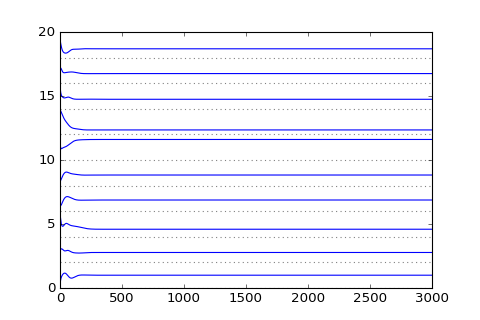

In [477]:
run_g_test(1.0, 3000)

<IPython.core.display.Javascript object>


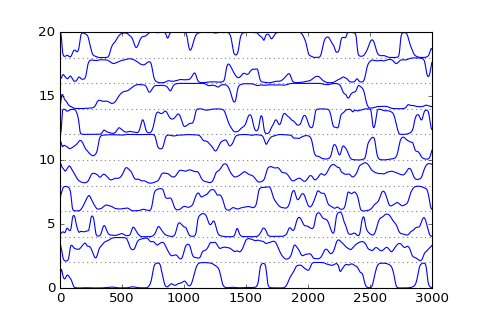

In [478]:
run_g_test(1.8, 3000)

<IPython.core.display.Javascript object>


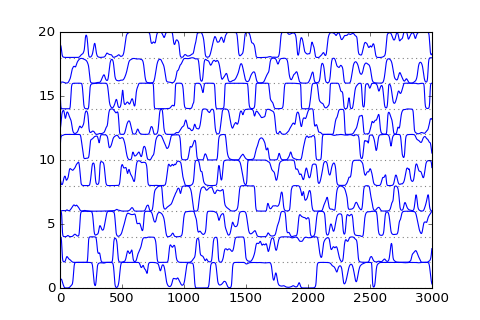

In [479]:
run_g_test(2.5, 3000)

<IPython.core.display.Javascript object>


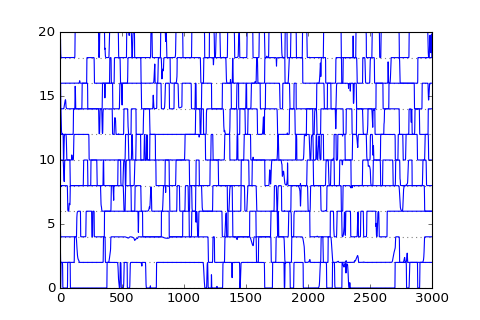

In [480]:
run_g_test(20.0, 3000)

In [481]:
def run_g_teach_test(g, teacher):
    steps = teacher.shape[1]
    net = gen_reservoir(g)
    result = net.teach(input_data=np.zeros((1, steps)), teacher=teacher)
    plot_n(result["r"], 10, steps)
    plt.plot(teacher[0] - 1, color="red")
    plt.ylim(plt.ylim()[0] - 2, plt.ylim()[1])

In [482]:
teacher = np.sin(np.linspace(0, 30, 3000) * 2 * np.pi / 5.0)[None, :]

Finished learning


<IPython.core.display.Javascript object>


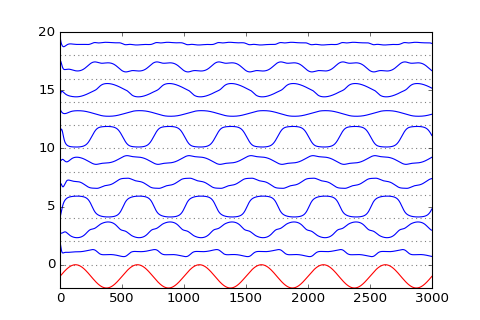

In [483]:
run_g_teach_test(1.0, teacher)

Finished learning


<IPython.core.display.Javascript object>


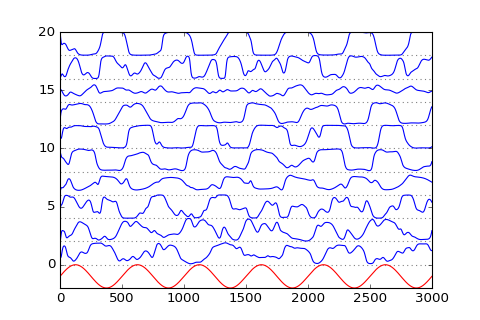

In [484]:
run_g_teach_test(1.8, teacher)

Finished learning


<IPython.core.display.Javascript object>


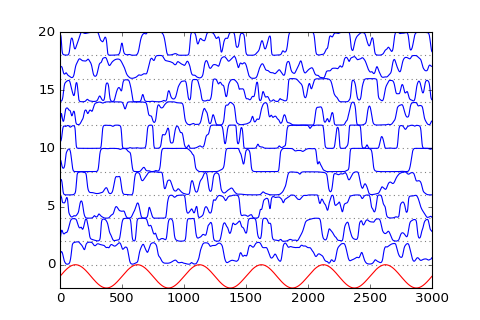

In [485]:
run_g_teach_test(2.5, teacher)

Finished learning


<IPython.core.display.Javascript object>


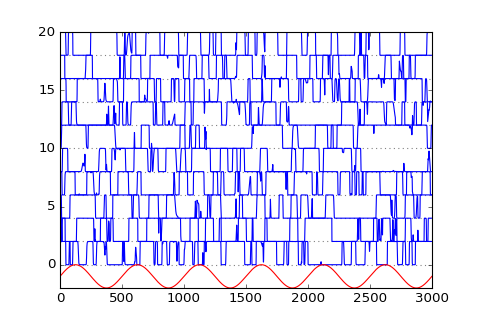

In [486]:
run_g_teach_test(20.0, teacher)

Now we want to try to learn the mackey glass system

In [487]:
def mackeyglass(N):
    import scipy.signal
    
    b = 0.1
    c = 0.2
    tau = 18
    result = np.zeros(N)
    
    result[:18] = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076,1.1352, 1.1485,
         1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]
    
    for i in range(18, N):
        result[i] = result[i-1] - b * result[i-1] + c * result[i-tau] / (1.0 + result[i - tau]**10)
    result = scipy.signal.resample(result, result.size * 2)
    return result[None, :]

def run_g_mg_test(g, teacher):
    steps = teacher.shape[1]
    net = gen_reservoir(g)
    result = net.teach(input_data=np.zeros((1, steps)), teacher=teacher, exclude_steps=200)
    plot_n(result["r"], 10, steps)
    plt.plot(teacher[0] - 2, color="red")
    plt.ylim(plt.ylim()[0] - 2, plt.ylim()[1])
    
    supposed_result = []

    for i in range(teacher.size):
        nex = net.W_readout.T @ result["x"][:, i]
        supposed_result.append(nex)
    plt.figure()
    plt.plot(supposed_result)
    
    result = net.run(input_data=np.zeros((1, steps)), state=ReservoirState(result["x"][:, -1:]))
    plot_n(result["r"], 10, steps)
    plt.plot(result["z"][0] - 2, color="red")
    plt.ylim(plt.ylim()[0] - 2, plt.ylim()[1])
    
    supposed_result = []

    for i in range(teacher.size):
        nex = net.W_readout.T @ result["x"][:, i]
        supposed_result.append(nex)
    plt.figure()
    plt.plot(supposed_result)


In [488]:
mg_teacher = mackeyglass(1500)

Finished learning


<IPython.core.display.Javascript object>


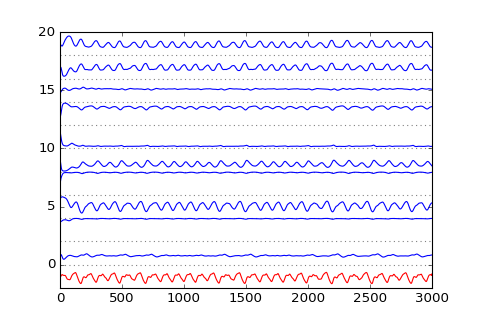

<IPython.core.display.Javascript object>


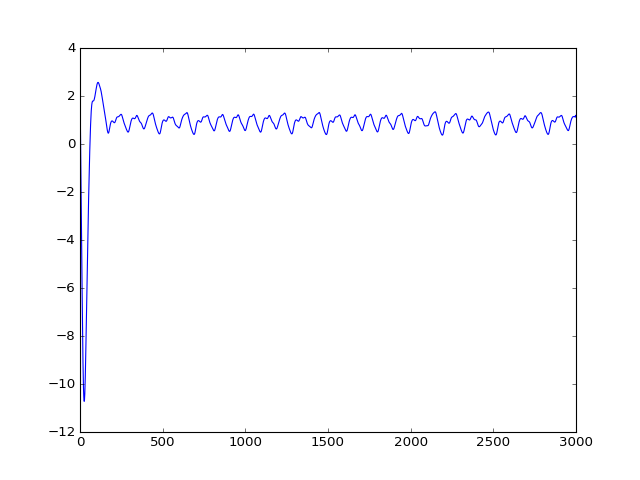

<IPython.core.display.Javascript object>


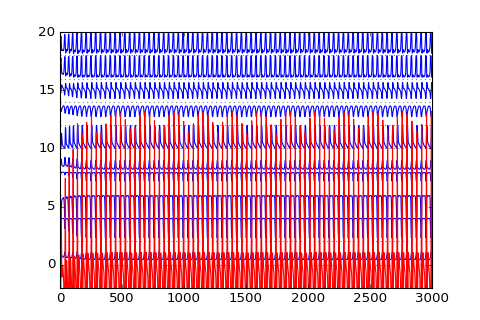

<IPython.core.display.Javascript object>


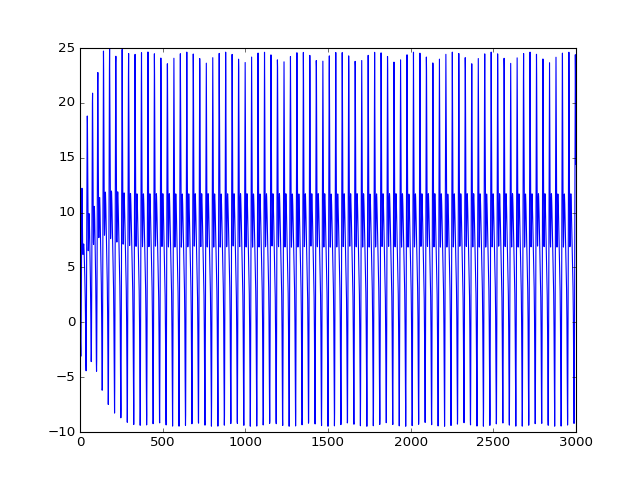

In [489]:
run_g_mg_test(1.4, mg_teacher)

Finished learning


<IPython.core.display.Javascript object>


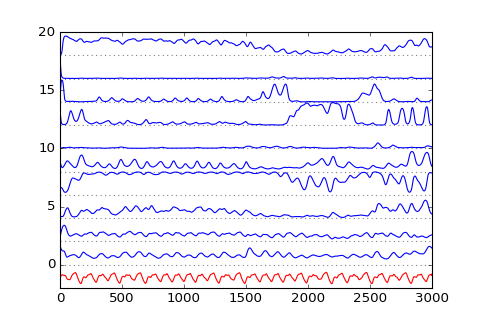

<IPython.core.display.Javascript object>


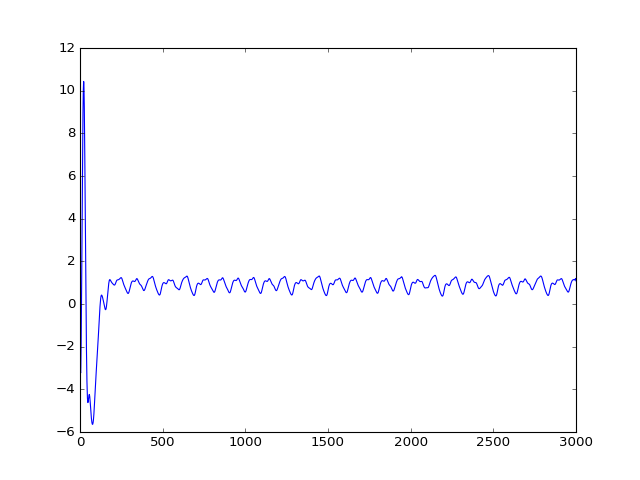

<IPython.core.display.Javascript object>


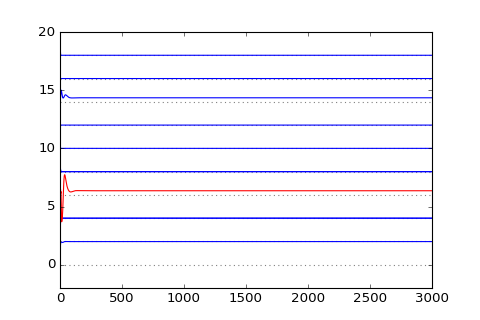

<IPython.core.display.Javascript object>


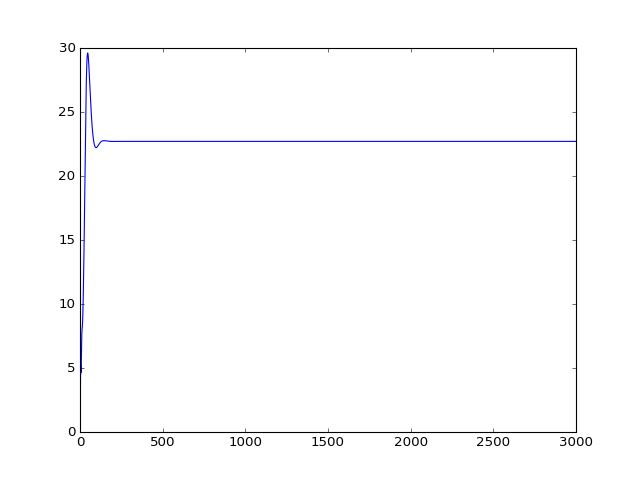

In [490]:
run_g_mg_test(1.8, mg_teacher)

Finished learning


<IPython.core.display.Javascript object>


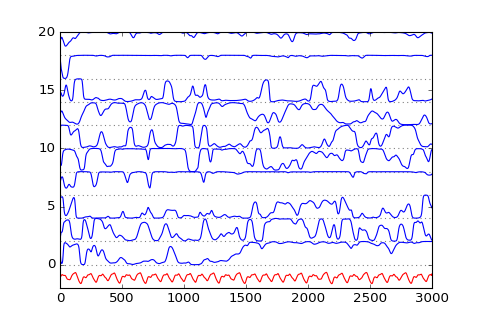

<IPython.core.display.Javascript object>


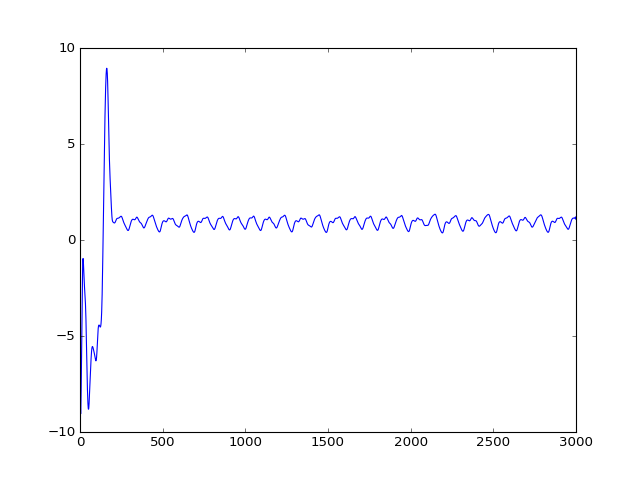

<IPython.core.display.Javascript object>


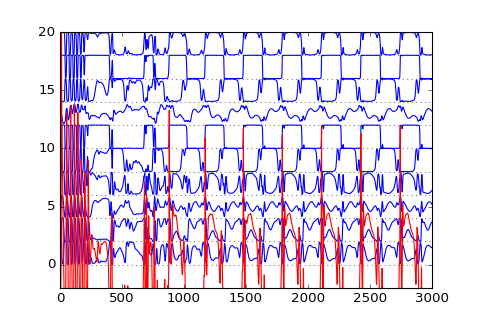

<IPython.core.display.Javascript object>


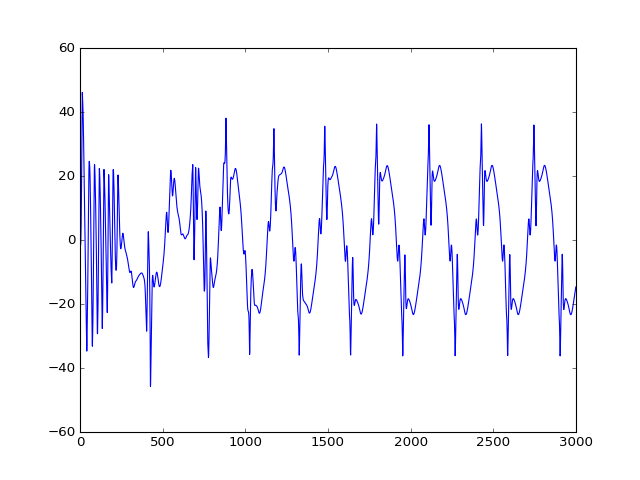

In [491]:
run_g_mg_test(2.5, mg_teacher)